# Part 1. Exploratory data analysis


## Data Overview

Getting the know and understand of data.

In [216]:
#importing libs

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="ticks")

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

#References - https://github.com/uber/h3-py
#           - https://github.com/uber/h3-py-notebooks
from h3 import h3

In [2]:
# Reading Excel File
rapido = pd.read_excel("Rapido Data Analyst Assignment DataSet (1).xlsx") # customer_id as index

# First Look at the data
rapido.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


#### Dimensions Information

In [3]:
# Dimension of Data
print('Dataframe Dimensions \n MEASURES    :',rapido.shape[0],' \n DIMENSIONS  :',rapido.shape[1])

Dataframe Dimensions 
 MEASURES    : 44587  
 DIMENSIONS  : 10


There are 44587 rows and 10 Columns 

In [4]:
i = 1
col_List = rapido.columns.tolist() 

# print('\nDimension :\n',Col_list )
for col in col_List:
    print(str(i)+'. '+col)
    i += 1

1. trip_id
2. customer_id
3. timestamp
4. pick_lat
5. pick_lng
6. drop_lat
7. drop_lng
8. travel_distance
9. travel_time
10. trip_fare


Serial No.|Column names|Description
---       |---         |---
1 | trip_id        | Unique identifier for trips
2 | customer_id    | Unique identifier for customers
3 | timestamp      | Time stamp of the trip in Epoch format(**in ms**)
4 | pick_lat       | Latitude of the pickup location
5 | pick_lng       | Longitude of the pickup location
6 | drop_lat       | Latitude of the drop location
7 | drop_lng       | Longitude of the drop location
8 | travel_distance| Distance of trip measured in KMs
9 | travel_time    | Duration of the trip measured in Minutes
10| trip_fare      | Trip fare calculated in Rupees

#### Unique Values

In [5]:
print ('\nThere are no missing values:\n', rapido.isnull().sum())


There are no missing values:
 trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64


**No missing value found**

---

#### Distinct Values

In [6]:
print ('\nUnique values :  \n',rapido.nunique())


Unique values :  
 trip_id            44587
customer_id        19139
timestamp          44586
pick_lat           29677
pick_lng           19902
drop_lat           29962
drop_lng           20530
travel_distance    11756
travel_time        43980
trip_fare            284
dtype: int64


In [7]:
print('Variables Data Types\n',rapido.dtypes) 

Variables Data Types
 trip_id             object
customer_id         object
timestamp            int64
pick_lat           float64
pick_lng           float64
drop_lat           float64
drop_lng           float64
travel_distance    float64
travel_time        float64
trip_fare            int64
dtype: object


In [8]:
rapido.describe()

,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,4.458700e+04,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000
mean,1.546632e+12,17.427919,78.435542,17.427891,78.434897,5.094359,15.819835,53.872833
std,1.518684e+08,0.030049,0.053333,0.037722,0.054965,3.365008,23.462865,33.430462
min,1.546368e+12,17.330339,78.308258,12.921696,77.548103,-1.000000,0.022750,20.000000
25%,1.546503e+12,17.405327,78.386562,17.405660,78.385010,2.744500,8.428525,36.000000
50%,1.546611e+12,17.432136,78.438866,17.431213,78.438164,4.299000,13.126250,46.000000
75%,1.546772e+12,17.446777,78.480839,17.446907,78.480255,6.679500,20.111167,60.000000
max,1.546886e+12,17.529791,78.600647,17.736155,78.634804,52.801000,4134.388700,1670.000000


##### OBSERVATIONS

1. We can clearly avoide pick and drop longitude and latitude respectively, they do not signify measure but geographical locations
2. Travel Distance(in KM) - Needs more observation 
    - Column looks funny. 
    - Minimum Travel Distance of -1. Clear Anomaly
    
3. Travel Times(in minutes)  - 
    - Maximum time travel on bike is 4134 : 68.9 Hours or 2 Days, 20 Hours, 53 Minutes and 59 Seconds. 
    - Minimum time traveled on bike is  0.02275 or 1.365 seconds

There are clear errors in data which need to be rectified

---

# Problem Statements
### Part 1. Exploratory data analysis
Perform an exploratory data analysis on the given dataset and share your findings.

### Part 2. Metric calculation
What is the average duration between the 1st trip and the 2nd trip of customers? Note: Consider only
the customers who have done 2 or more trips.

### Part 3. Model building
Build a model to predict trip_fare using travel_distance and travel_time. Measure the accuracy of the
model and use the model to predict trip_fare for a trip with travel_distance of 3.5 kms and travel_time

### Part 4. Top Hex clusters
Top 5 pairs of hex (resolution=8) clusters where most of the trips happened? You can refer to the
library listed below to get hexid for a given latitude and longitude.
-  https://github.com/uber/h3-py

Expected output

Rank Hex | pair (source_hexid, destination_hexid) |  Total trips
---|---|---
1 | 883c8e4159fffff to 88754e6499fffff |34
2 | 883db66b55fffff to 883c8e4159fffff | 28

## EDA - Exploratory Data Analysis

- `Part 1` of problem statement deals with entrire data. 
- Each problem statement deals with different slices of dataset.
- So to keep it simple each part of problem statement has its own EDA.

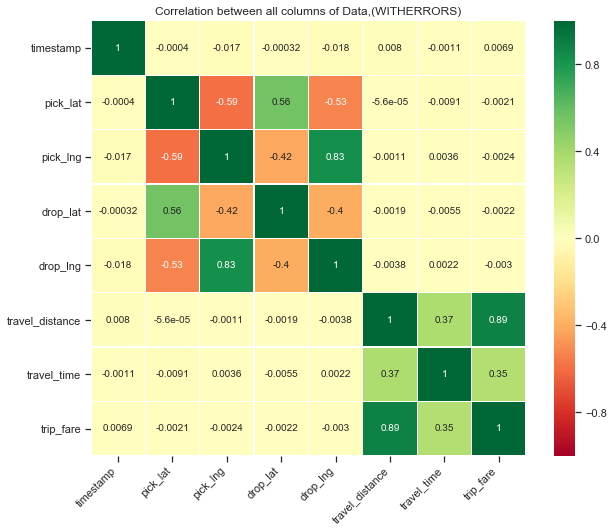

In [56]:
##  correlation between variables indicates that as one variable changes in value,
##  the other variable tends to change in a specific direction.

rapido_corr = rapido
# rapido_corr = rapido[['travel_distance', 'travel_time', 'trip_fare']]
corr = rapido_corr.corr()

def hmap(corr,strr='HeatMap'):
    ax = sb.heatmap(
        corr,
        annot=True,
        cmap='RdYlGn',
        linewidths=0.2,
        vmin=-1, 
        vmax=1, 
        center=0,
        square=True
        )
    fig = plt.gcf()
    fig.set_size_inches(10,8)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    plt.title(strr)
    plt.show()
hmap(corr,'Correlation between all columns of Data,(WITHERRORS)')

Based on correlation matrix above
There is positive correlation between 
    - Distance travelled and trip's fare
    - Time travelled and trip's fare

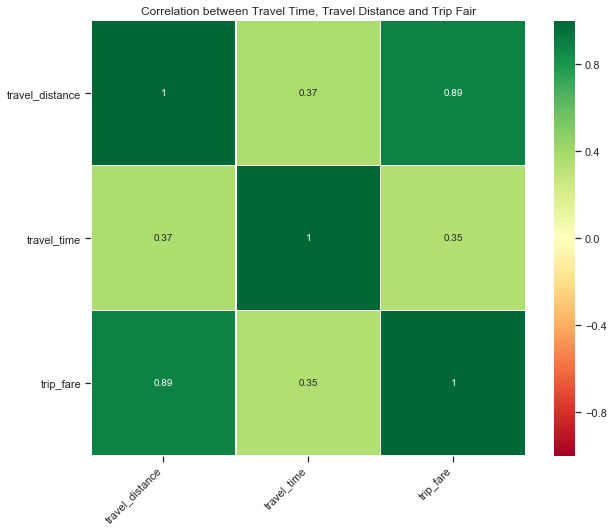

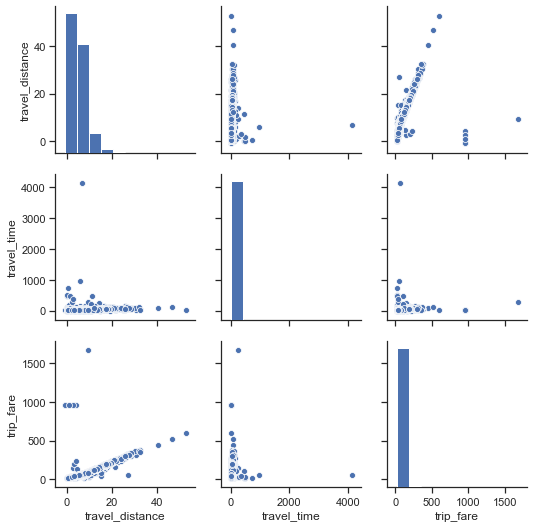

In [161]:
corr = rapido[['travel_distance','travel_time','trip_fare']].corr()
hmap(corr,'Correlation between Travel Time, Travel Distance and Trip Fair')

sb.pairplot(rapido[
    ['travel_distance','travel_time','trip_fare']
])




### NOTE: THESE ARE OBSERVATIONS WITHOUT ERROR HANDLING
For example, we have a `travel_time` greater than `4000`

## Data Manipulation


### Data Time Conversion

In [12]:
# datetime_list = pd.to_datetime(rapido['timestamp'],unit='ms')
# rapidodt_ts = pd.to_datetime(rapidodt['timestamp'],unit='ms')
# rapidodt['timestamp'] = rapidodt_ts
# rapidodt


# What is the average duration between the 1st trip and the 2nd trip of customers? Note: Consider only the customers who have done 2 or more trips.

For this problem the only needed columns are `trip_id`, `customer_id` and `timestamp`.
Since other measure are irrelavent and have no correlations, as can be seen in corelation matrix above.

In [90]:
#Not altering the orginial dataset.
rapidodt = rapido.copy()
rapidodt = rapidodt[['trip_id','customer_id','timestamp']]
rapidodt.head() #REMOVE LATER

,trip_id,customer_id,timestamp
0,ID001,CUST_001,1546709270211
1,ID002,CUST_002,1546709309524
2,ID003,CUST_003,1546709331857
3,ID004,CUST_004,1546709358403
4,ID005,CUST_005,1546709386884


In [91]:
# One Customer can have more than one trip, all trips have unique ID.
rapidodt.loc[rapidodt['customer_id']== 'CUST_001']

,trip_id,customer_id,timestamp
0,ID001,CUST_001,1546709270211
1389,ID1390,CUST_001,1546871083066
1866,ID1867,CUST_001,1546873649099
4983,ID4984,CUST_001,1546765642873
5269,ID5270,CUST_001,1546769557670
5528,ID5529,CUST_001,1546773038937
33261,ID33262,CUST_001,1546676690138
36625,ID36626,CUST_001,1546702978281


In [95]:
# Calculating number of trips per customer
rapido_series = rapidodt['customer_id'].value_counts()
print(rapido_series.shape[0] == rapido['customer_id'].nunique()) # Which is same as number of unique cutomers

True

In [96]:
rapido_series_index = rapido_series.index
rapido_series = rapido_series.tolist()
rapido2 = pd.DataFrame(data = rapido_series_index,columns=['Customer_ID'])
rapido2['trip_count'] = rapido_series
print('No of unique customer : ',len(rapido2))
rapido2.head()

No of unique customer :  19139


,Customer_ID,trip_count
0,CUST_279,53
1,CUST_4119,25
2,CUST_3100,25
3,CUST_1120,21
4,CUST_232,21


Trips Per Customer Tableau visualization. 
Total Customer : 44587

![Trips per Customer](tripcount.png)

**Customer 279 is an MVP(MVC)**

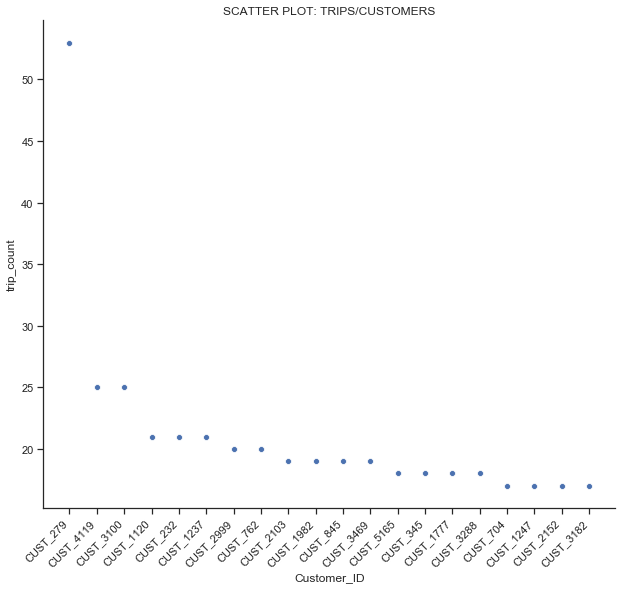

In [107]:
# Scatter plot for top 20 TRIPS/CUSTOMERS
ax = sb.relplot(y="trip_count", x="Customer_ID", data=rapido2.head(20));
fig = plt.gcf()
fig.set_size_inches(10,8)
ax.set_xticklabels(
        rotation=45,
        horizontalalignment='right'
    );
plt.title('SCATTER PLOT: TRIPS/CUSTOMERS')
plt.show()

In [108]:
# Customers with more then 1 trip.
rapido2_filtered = rapido2[rapido2['trip_count']>=2]
rapido_filtered_customer_list = rapido2_filtered['Customer_ID'].tolist()
print('There are ',len(rapido_filtered_customer_list),' customer with more then one trip')

There are  9130  customer with more then one trip


In [117]:
rapidodt['customer_id'].astype(str)

# Filtering DataSet : Only have values of customer with more than one trip.
rapidodt = rapidodt[rapidodt.customer_id.isin(rapido_filtered_customer_list)] 

In [116]:
#ORIGINAL DATASET
print(rapido.shape)
rapido.head() 

(44587, 10)


,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [113]:
# Filtered Dataset of Customer with more then 1 trip.
print(rapidodt.shape)
rapidodt.head()

(34578, 3)


,trip_id,customer_id,timestamp
0,ID001,CUST_001,1546709270211
2,ID003,CUST_003,1546709331857
3,ID004,CUST_004,1546709358403
4,ID005,CUST_005,1546709386884
5,ID006,CUST_006,1546709396752


In [23]:
# Initial a new dataframe which will store value of first two trips of customer 
rapidodt_top2 = pd.DataFrame()

# Of all the customer with trips more than one, filter the top 2 and save in the new dataframe
for customer_id in rapido_filtered_customer_list:
    df_temp = rapidodt.loc[rapidodt['customer_id']== customer_id].sort_values('timestamp').head(2)
    rapidodt_top2 = rapidodt_top2.append(df_temp)

In [26]:
#Data Time Conversion
rapido_customer_avg = pd.DataFrame(data=rapido_filtered_customer_list,columns=['customer_id'])
rapidodt_top2['timestamp'] = pd.to_datetime(rapidodt_top2['timestamp'],unit='ms')
rapidodt_top2.head()

,trip_id,customer_id,timestamp
17350,ID17351,CUST_279,2019-01-02 05:59:14.312
17583,ID17584,CUST_279,2019-01-02 06:33:58.294
19645,ID19646,CUST_4119,2019-01-02 11:47:13.914
20432,ID20433,CUST_4119,2019-01-02 13:01:56.379
15398,ID15399,CUST_3100,2019-01-02 02:48:03.038


In [27]:
#Time Difference between first two trip of all customer with trip count more than 1

l = []
for customer_id in rapido_filtered_customer_list:
    temp = rapidodt_top2.loc[rapidodt['customer_id']== customer_id] 
    var = temp.iloc[1]['timestamp'] - temp.iloc[0]['timestamp']
    l.append(var)

In [119]:
print('Minimum time between trip by a customer : ',np.min(l),'and max difference is : ' ,np.max(l))
print('\nAverage duration between the 1st trip and the 2nd trip of customers : ',np.mean(l))

Minimum time between trip by a customer :  0 days 00:01:41.770000 and max difference is :  5 days 14:43:14.647000

Averageduration between the 1st trip and the 2nd trip of customers :  1 days 00:47:09.691580


Average duration between the 1st trip and the 2nd trip of customers :  **1 days 47 minutes**


---

# Part 3. Model building
Build a model to predict trip_fare using travel_distance and travel_time. Measure the accuracy of the
model and use the model to predict trip_fare for a trip with travel_distance of 3.5 kms and travel_time
of 15 minutes.


Train Data = ['travel_distance','travel_time']


Test Data =[3.5,15]


Serial No. |Column names      | Description
---|---|---
1 |         travel_distance   | Distance of trip measured in KMs
2 |         travel_time       | Duration of the trip measured in Minutes
3 |         trip_fare         | Trip fare calculated in Rupees


### Error Handling

`Time Related Error`

In [185]:
rapido_model = rapido[['travel_distance', 'travel_time', 'trip_fare']]
print(rapido_model.sort_values('travel_distance').head(10))


       travel_distance  travel_time  trip_fare
12636             -1.0    11.838667        959
145               -1.0    19.247367        959
17206             -1.0    11.014850        959
42371              0.0     0.311767         20
152                0.0     0.242750         20
23053              0.0     0.182883         20
35669              0.0     0.092817         20
155                0.0     0.261333         20
19505              0.0     0.366333         20
6262               0.0     0.078567         20


As seen above there are a lot of errors in the data.
There are 3 negative distance values which make no sense.

For example, A customer travel  `-1 KM` in `11 minutes ` and was charged `959 rupees`. 

There 3 many entries with `0 KM ` distance travelled. 

**DELETING ALL SUCH ANOMALIES**

---

`Fare Related Error`

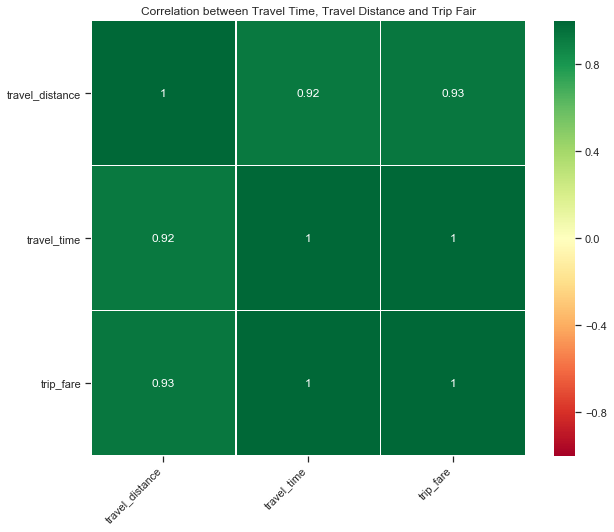

In [186]:
corr = rapido_model.sort_values('trip_fare',ascending=False).head().corr()
hmap(corr,'Correlation between Travel Time, Travel Distance and Trip Fair')

**This contradicts the original data set**

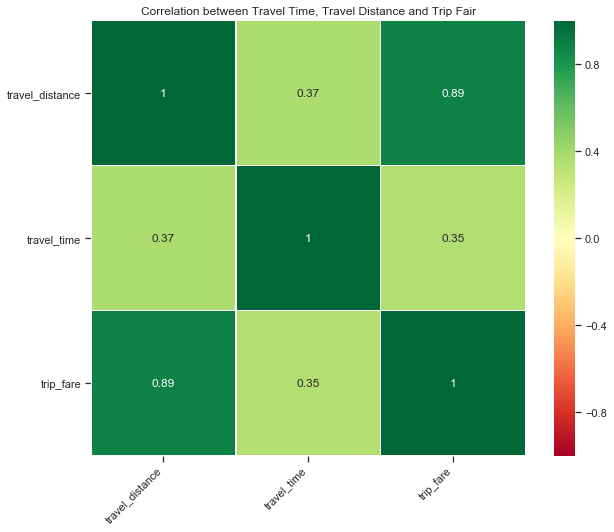

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
42530,ID42531,CUST_18770,1546519406927,17.425972,78.340454,17.441185,78.391289,9.4,267.825483,1670
27304,ID27305,CUST_2196,1546858611537,17.404274,78.492340,17.411062,78.493576,2.7,10.949667,959
17206,ID17207,CUST_7151,1546407689604,17.433880,78.384483,17.441532,78.362556,-1.0,11.014850,959
145,ID146,CUST_142,1546712267334,17.396492,78.479980,17.368525,78.533218,-1.0,19.247367,959
36239,ID36240,CUST_6416,1546699878502,17.397224,78.480911,17.428328,78.450958,1.0,1.596217,959


In [187]:
corr = rapido[['travel_distance','travel_time','trip_fare']].corr()
hmap(corr,'Correlation between Travel Time, Travel Distance and Trip Fair')
rapido.sort_values('trip_fare',ascending=False).head()

In [188]:
rapido_model.sort_values('trip_fare',ascending=False).head()

,travel_distance,travel_time,trip_fare
42530,9.4,267.825483,1670
27304,2.7,10.949667,959
17206,-1.0,11.014850,959
145,-1.0,19.247367,959
36239,1.0,1.596217,959


First 4 entries are clear anomalies in dataset, since there is no relation between the distance, time or fare
Hence removing them from the dataset makes sense. 


In [189]:
print('9th row from the last was fared wrong. Need to remove ')
rapido_model.sort_values('trip_fare',ascending=False).head()


9th row from the last was fared wrong. Need to remove 


,travel_distance,travel_time,trip_fare
42530,9.4,267.825483,1670
27304,2.7,10.949667,959
17206,-1.0,11.014850,959
145,-1.0,19.247367,959
36239,1.0,1.596217,959


In [190]:
# Filtering
rapido_model = rapido_model[~(rapido_model['trip_fare'] == 20) & (rapido_model['travel_distance'] > .9)]
rapido_model = rapido_model[rapido_model['travel_distance'] > 0]

In [191]:
rapido_model['travel_distance'].value_counts(normalize= True,bins=10)

(0.848, 6.091]      0.697161
(6.091, 11.281]     0.249569
(11.281, 16.471]    0.042258
(16.471, 21.661]    0.009036
(21.661, 26.851]    0.001517
(26.851, 32.041]    0.000322
(32.041, 37.231]    0.000069
(47.611, 52.801]    0.000023
(42.421, 47.611]    0.000023
(37.231, 42.421]    0.000023
Name: travel_distance, dtype: float64

In [192]:
# Speed : 10 - 120
# Trip-Fare : < 522
rapido_model['speed'] = rapido_model['travel_distance']/(rapido_model['travel_time']/60)
rapido_model.sort_values(['travel_distance'],ascending=False).head(20)

# Choosing value of speed between 10 and 120
rapido_model = rapido_model[rapido_model['speed'].between(10,120)]

## values above 522 are anomalies as the data do not add up.
rapido_model = rapido_model[rapido_model['trip_fare']<522] 
rapido_model.sort_values('travel_time',ascending=False).head()

,travel_distance,travel_time,trip_fare,speed
32164,25.690,142.484950,275,10.817985
18078,26.676,122.900400,314,13.023229
14422,20.544,117.289150,239,10.509412
40951,18.706,108.660950,199,10.329010
17500,19.886,107.459217,226,11.103375


In [193]:
#Checking for missing Values
print ('\nThere are no missing values:\n', rapido_model.isnull().sum())


There are no missing values:
 travel_distance    0
travel_time        0
trip_fare          0
speed              0
dtype: int64


DATA AFTER ERROR HANDLING Exploring Filtered DataSet

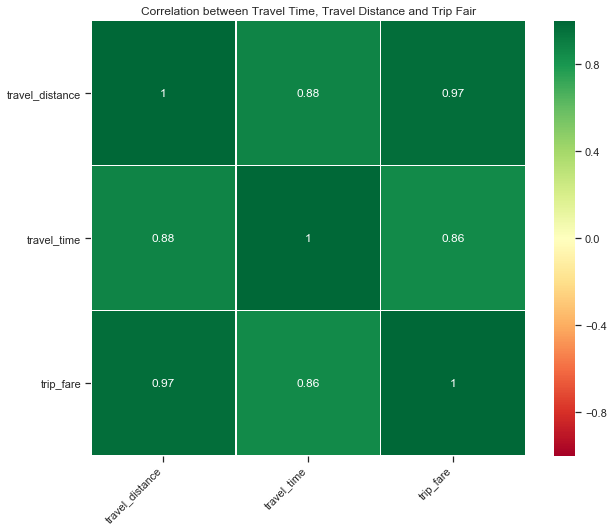

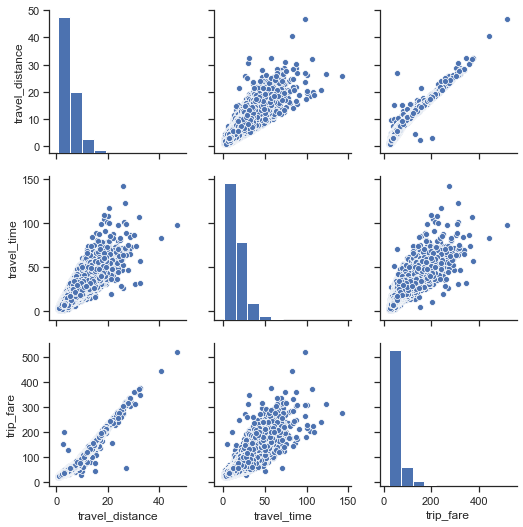

In [194]:
corr = rapido_model[['travel_distance','travel_time','trip_fare']].corr()
hmap(corr,'Correlation between Travel Time, Travel Distance and Trip Fair')

sb.pairplot(rapido_model[
    ['travel_distance','travel_time','trip_fare']
])



In [195]:
# Splitting into two 
train_data = rapido_model[['travel_distance','travel_time']]
labels = rapido_model['trip_fare']


In [239]:
X_train,X_test,Y_train,Y_test = train_test_split(train_data,labels,random_state=0)

lr = LogisticRegression(multi_class='ovr',solver='liblinear')
lr.fit(X_train,Y_train)
predictions   = lr.predict(X_test)
probabilities = lr.predict_proba(X_test)

In [240]:
X_test_2 = pd.DataFrame([[3.5,15.0]],columns=['travel_distance','travel_time'])
X_test_2

,travel_distance,travel_time
0,3.5,15.0


In [241]:
prediction = lr.predict(X_test_2)
prediction[0]

43

In [243]:
rapido_model[rapido_model['travel_distance'] == 3.5]

,travel_distance,travel_time,trip_fare,speed
950,3.5,6.468933,40,32.462848
4829,3.5,6.410500,32,32.758755
5364,3.5,9.746517,40,21.546159
12479,3.5,10.469333,44,20.058584
16128,3.5,10.393767,37,20.204417
19862,3.5,9.023967,43,23.271363
26661,3.5,9.469833,41,22.175681
30965,3.5,5.386283,45,38.987923
31590,3.5,9.616333,41,21.837845
40451,3.5,13.037350,41,16.107568


# Part 4. Top Hex clusters
Top 5 pairs of hex (resolution=8) clusters where most of the trips happened? You can refer to the
library listed below to get hexid for a given latitude and longitude.
-  https://github.com/uber/h3-py

Expected output

Rank Hex | pair (source_hexid, destination_hexid) |  Total trips
---|---|---
1 | 883c8e4159fffff to 88754e6499fffff |34
2 | 883db66b55fffff to 883c8e4159fffff | 28

### Errors in Data
This image show the Error in drop location.Exluding all location outside Hyderabad
![Error In Geo Data](Error.png)

### Removing Errors in Data
Based on findings from Tablue Worksheet.
Removing Entries or locations which are outside Hyderabad.
Remove 4 Drop Entries from spatial part of data with Ids.
 - ID25712
 - ID35159
 - ID39114
 - ID30988

In [200]:
rapido[rapido['drop_lat'] == 17.4829464]

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
39113,ID39114,CUST_3041,1546492009096,17.415167,78.425278,17.482946,78.032783,3.647,13.02025,40


In [201]:
rapido[rapido['drop_lat'] == 17.3520184]

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
35158,ID35159,CUST_4572,1546692501613,17.394796,78.435707,17.352018,78.230537,2.836,6.5822,35


In [202]:
rapido[rapido['drop_lat'] == 12.9216957]

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
25711,ID25712,CUST_1551,1546845012421,17.446897,78.388855,12.921696,77.548103,4.183,11.418383,47


In [203]:
rapido[rapido['drop_lat'] == 17.7361546]

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
30987,ID30988,CUST_4562,1546657274827,17.405493,78.450882,17.736155,78.479485,11.17,35.80665,116


In [204]:
rapido_hex_geo = rapido.copy()
rapido_hex_geo  = rapido_hex_geo[(rapido_hex_geo['drop_lat'] != 12.9216957) &  (rapido_hex_geo['drop_lat'] != 17.3520184) & (rapido_hex_geo['drop_lat'] != 17.4829464) & (rapido_hex_geo['drop_lat'] != 17.7361546)]

In [205]:
rapido_hex_geo.head() # REMOVE LATER

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


After the fix 
![Filtered the Geo Data](Fixed.png)

In [206]:
#Uncomment to check changes
#rapido_hex_geo[rapido_hex_geo['drop_lat'] == 12.9216957]
# rapido_hex_geo[rapido_hex_geo['drop_lat'] == 17.3520184]
# rapido_hex_geo[rapido_hex_geo['drop_lat'] == 17.4829464]
# rapido_hex_geo[rapido_hex_geo['drop_lat'] == 17.7361546]
# OR 
#rapido_hex_geo.shape

In [207]:
rapido_hex_geo = rapido.copy()
resolution=8

rapido_hex_geo = rapido_hex_geo[['pick_lat','pick_lng','drop_lat','drop_lng']]
rapido_hex_geo["hex_id_pick"] = rapido_hex_geo.apply(lambda row: h3.geo_to_h3(row["pick_lat"], row["pick_lng"], resolution), axis = 1)
rapido_hex_geo["hex_id_drop"] = rapido_hex_geo.apply(lambda row: h3.geo_to_h3(row["pick_lat"], row["pick_lng"], resolution), axis = 1)

In [208]:
rapido_hex_geo.head() # REMOVE LATER

,pick_lat,pick_lng,drop_lat,drop_lng,hex_id_pick,hex_id_drop
0,17.442705,78.387878,17.457829,78.399056,8860a259b9fffff,8860a259b9fffff
1,17.490189,78.415512,17.450548,78.367294,8860b19695fffff,8860b19695fffff
2,17.370108,78.515045,17.377041,78.517921,8860a25b4dfffff,8860a25b4dfffff
3,17.439314,78.443001,17.397131,78.516586,8860a25915fffff,8860a25915fffff
4,17.432325,78.381966,17.401625,78.400032,8860a25995fffff,8860a25995fffff


In [209]:
# rapido_hex_geo.groupby(['hex_id_pick','hex_id_drop']).agg({i:'value_counts' for i in rapido_hex_geo.columns[5:]})
rapido_hex_geo2 = rapido_hex_geo.groupby(["hex_id_pick", "hex_id_drop"]).size().reset_index(name="Trip")
rapido_hex_geo2 = rapido_hex_geo2.sort_values('Trip',ascending=False)

In [210]:
rapido_hex_geo2.head() # REMOVE LATER

,hex_id_pick,hex_id_drop,Trip
236,8860a259b9fffff,8860a259b9fffff,1288
237,8860a259bbfffff,8860a259bbfffff,933
220,8860a25995fffff,8860a25995fffff,933
49,8860a24a65fffff,8860a24a65fffff,798
53,8860a24a6dfffff,8860a24a6dfffff,720


In [211]:
rapido_hex_geo2["Hex pair (source_hexid, destination_hexid)"] = rapido_hex_geo2["hex_id_pick"].astype(str) + ' to ' + rapido_hex_geo2["hex_id_drop"]
rapido_hex_geo2 = rapido_hex_geo2.head()

In [212]:
rapido_hex_geo3= rapido_hex_geo2[['Hex pair (source_hexid, destination_hexid)','Trip']]
rapido_hex_geo3 = rapido_hex_geo3.reset_index(drop = True)

In [213]:
rapido_hex_geo3.index = np.arange(1,len(rapido_hex_geo3)+1)
rapido_hex_geo3.index.name='Rank'
rapido_hex_geo3

,"Hex pair (source_hexid, destination_hexid)",Trip
Rank,,
1,8860a259b9fffff to 8860a259b9fffff,1288
2,8860a259bbfffff to 8860a259bbfffff,933
3,8860a25995fffff to 8860a25995fffff,933
4,8860a24a65fffff to 8860a24a65fffff,798
5,8860a24a6dfffff to 8860a24a6dfffff,720
